# Import All Neccessary Library

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score
)
from sklearn.model_selection import RandomizedSearchCV



# Import Dataset

In [2]:
dataset_ProductivityScore = "C:/Users/Jia Xuan/Documents/FYP/social_media_vs_productivity.csv"
df = pd.read_csv(dataset_ProductivityScore)

# Data Understanding

## Separate numeric and categorical columns

In [3]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include=["object", "bool"]).columns

## Dataset Overview

In [4]:
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


## Dataset Structure Description

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

## Summary Statistics

In [6]:
df.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,27235.000000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000.000000,30000.000000,30000.000000,27270.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,2.074813,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,1.410047,9.252956,7.280415,2.121194
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.639566,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,1.000000,8.000000,4.541872,3.363580
50%,41.000000,3.025913,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,2.000000,16.000000,10.013677,4.951049
75%,53.000000,4.368917,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,3.000000,24.000000,15.300809,6.581323
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


## Distribution Analysis for Numerical Features

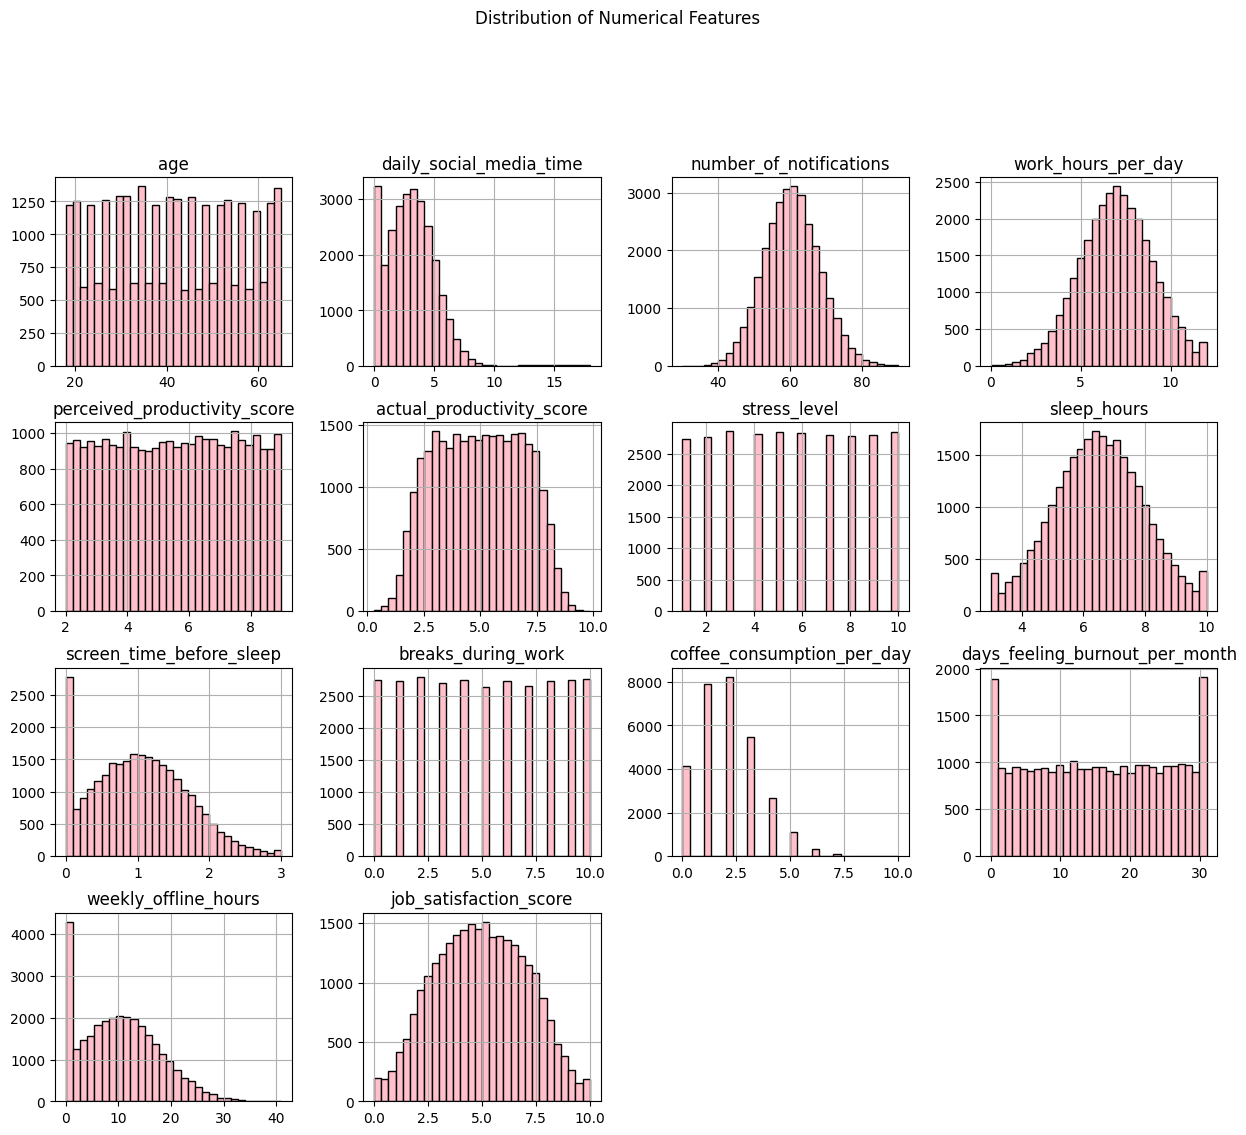

In [7]:
df[numerical_cols].hist(
    figsize=(15, 12),
    bins=30,
    color='pink',
    edgecolor='black'
)

plt.suptitle("Distribution of Numerical Features", y=1.02)
plt.show()


## Categorical Features Analysis

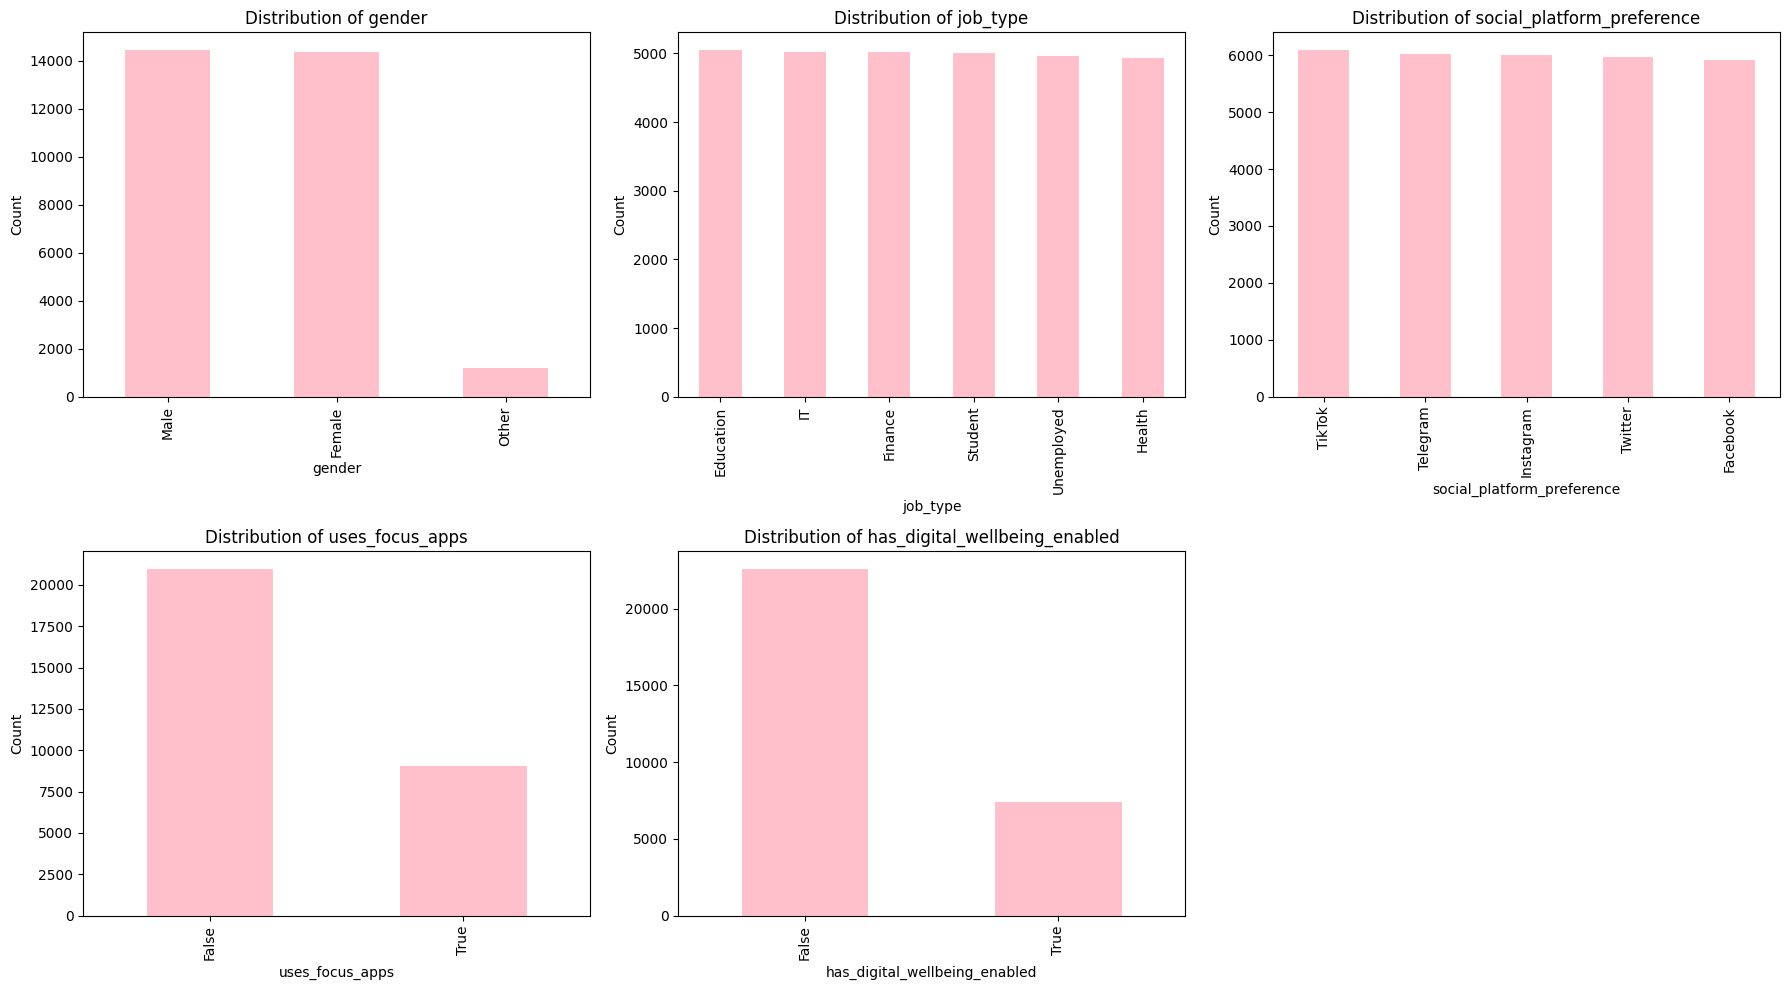

In [8]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

n_cols = 3  
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(
        kind='bar',
        ax=axes[i],
        color='pink'
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Correlation Analysis

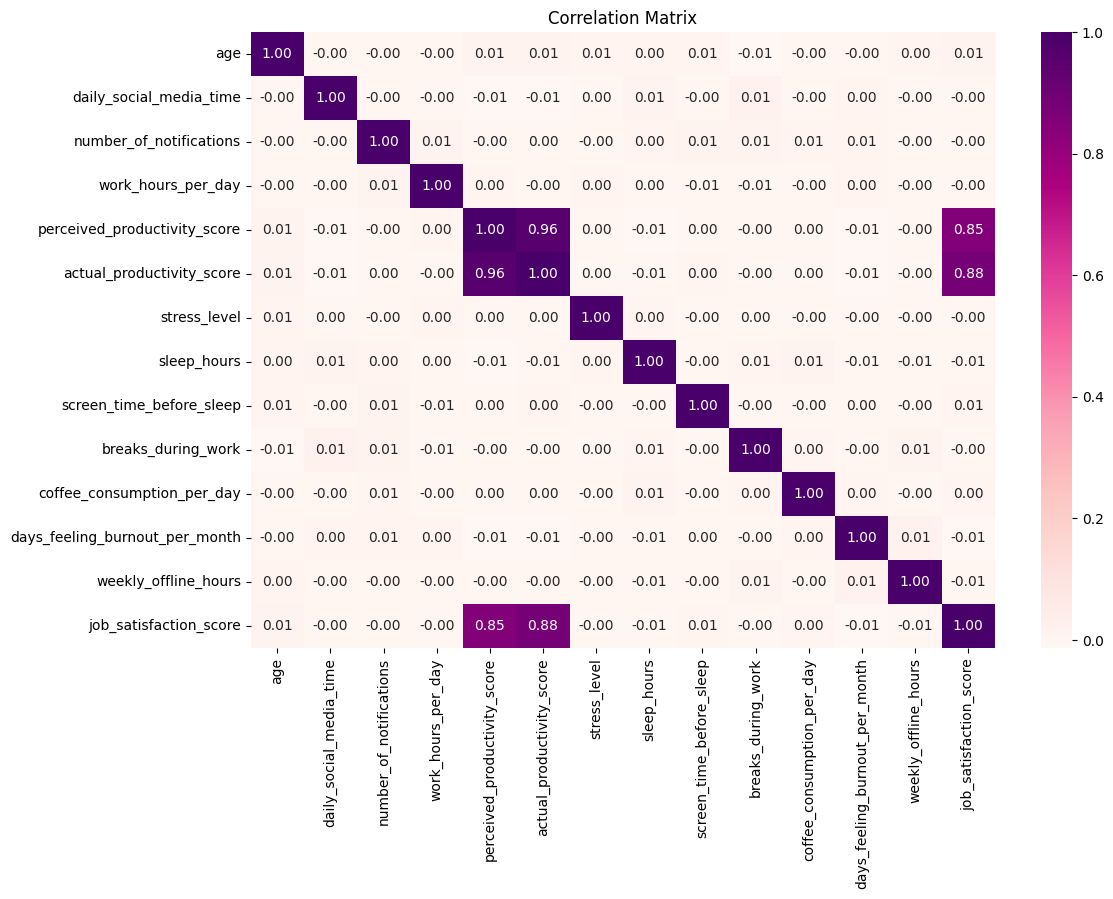

In [9]:
corr = df[numerical_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdPu")
plt.title("Correlation Matrix")
plt.show()

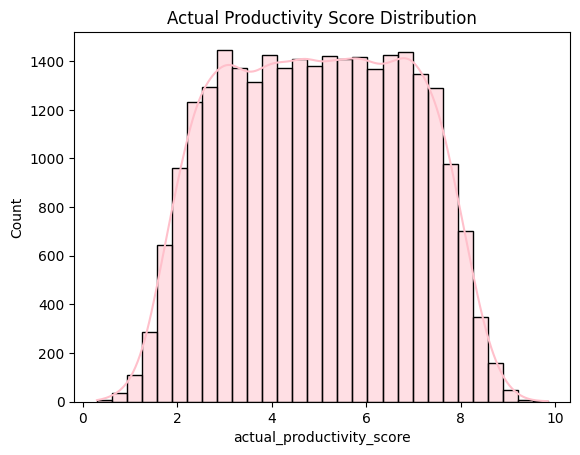

In [10]:
sns.histplot(df['actual_productivity_score'], bins=30, kde=True,color='pink')
plt.title("Actual Productivity Score Distribution")
plt.show()

## Data Quality Analysis

### Missing Value Analysis

In [11]:
df.isnull().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

### Outlier Analysis

In [12]:
numerical_cols = df.select_dtypes(include=np.number).columns

outlier_count = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    count = ((df[col] < lower) | (df[col] > upper)).sum()
    
    outlier_count.append({
        "Column": col,
        "Number_of_Outliers": count
    })

iqr_outlier_df = pd.DataFrame(outlier_count)

iqr_outlier_df.sort_values("Number_of_Outliers", ascending=False)


,Column,Number_of_Outliers
2,number_of_notifications,261
1,daily_social_media_time,226
10,coffee_consumption_per_day,127
12,weekly_offline_hours,116
8,screen_time_before_sleep,98
3,work_hours_per_day,97
5,actual_productivity_score,0
4,perceived_productivity_score,0
0,age,0
6,stress_level,0


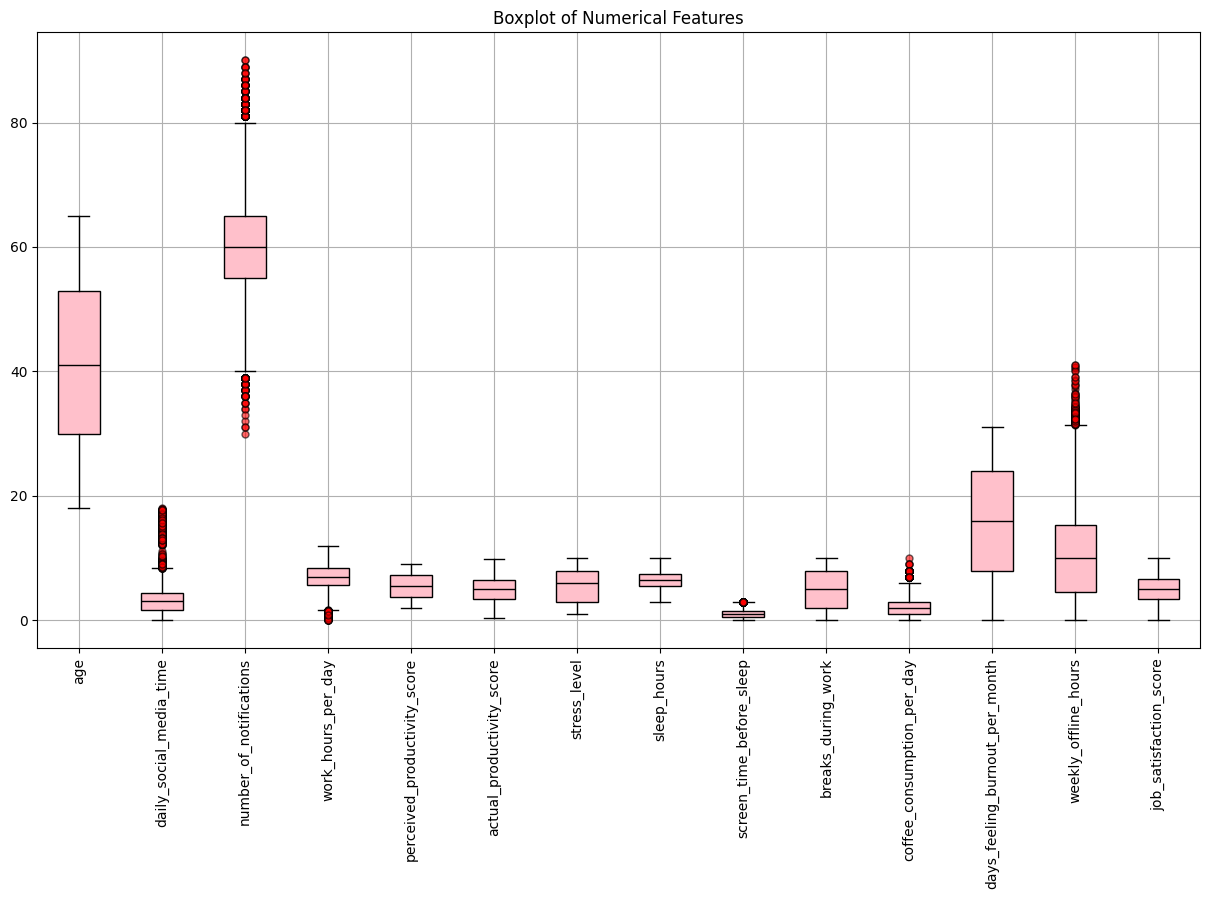

In [13]:
plt.figure(figsize=(15, 8))

df[numerical_cols].boxplot(
    rot=90,
    patch_artist=True,
    boxprops=dict(facecolor='pink', color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.6)
)

plt.title("Boxplot of Numerical Features")
plt.show()


### Duplicate Data Analysis

In [14]:
duplicate_rows = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_rows}")

Number of Duplicate Rows: 0


# Data Preprocessing

## Missing Value Handling

### Drop Row with Missing Value in Target

In [15]:
df = df.dropna(subset=['actual_productivity_score'])

### Fill Other Numeric Missing Values with Mean

In [17]:
imputer_mean = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_mean.fit_transform(df[numerical_cols])

### Fill categorical missing values with mode

In [18]:
imputer_mode = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_mode.fit_transform(df[categorical_cols])

In [19]:
df.isnull().sum()

age                               0
gender                            0
job_type                          0
daily_social_media_time           0
social_platform_preference        0
number_of_notifications           0
work_hours_per_day                0
perceived_productivity_score      0
actual_productivity_score         0
stress_level                      0
sleep_hours                       0
screen_time_before_sleep          0
breaks_during_work                0
uses_focus_apps                   0
has_digital_wellbeing_enabled     0
coffee_consumption_per_day        0
days_feeling_burnout_per_month    0
weekly_offline_hours              0
job_satisfaction_score            0
dtype: int64

## Outlier Handling

In [20]:
# Numeric columns
num_cols = df.select_dtypes(include='number').columns

# --- Outliers BEFORE cleaning ---
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_before = ((df[num_cols] < lower) | (df[num_cols] > upper)).sum()

# --- Clip the outliers (IQR method) ---
for col in num_cols:
    df[col] = np.clip(df[col], lower[col], upper[col])

# --- Outliers AFTER cleaning ---
outliers_after = ((df[num_cols] < lower) | (df[num_cols] > upper)).sum()

# --- Comparison table ---
outlier_comparison = pd.DataFrame({
    'Before': outliers_before,
    'After': outliers_after
})

outlier_comparison


,Before,After
age,0,0
daily_social_media_time,301,0
number_of_notifications,244,0
work_hours_per_day,88,0
perceived_productivity_score,0,0
actual_productivity_score,0,0
stress_level,0,0
sleep_hours,0,0
screen_time_before_sleep,184,0
breaks_during_work,0,0


## Drop Useless Column

In [21]:
useless_columns = ['job_type', 'social_platform_preference','number_of_notifications',
                   'perceived_productivity_score','screen_time_before_sleep']
df = df.drop(columns=useless_columns)

In [22]:
df.head()


,age,gender,daily_social_media_time,work_hours_per_day,actual_productivity_score,stress_level,sleep_hours,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56.0,Male,4.180940,6.753558,7.291555,4.0,5.116546,8.0,False,False,4.0,11.0,21.927072,6.336688
1,46.0,Male,3.249603,9.169296,5.165093,7.0,5.103897,7.0,True,True,2.0,25.0,0.000000,3.412427
2,32.0,Male,3.113776,7.910952,3.474053,4.0,8.583222,0.0,True,False,3.0,17.0,10.322044,2.474944
3,60.0,Female,3.113776,6.355027,1.774869,6.0,6.052984,1.0,False,False,0.0,4.0,23.876616,1.733670
5,38.0,Male,1.512568,6.429312,4.081026,5.0,5.515251,5.0,False,True,5.0,2.0,0.000000,4.568728


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27635 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             27635 non-null  float64
 1   gender                          27635 non-null  object 
 2   daily_social_media_time         27635 non-null  float64
 3   work_hours_per_day              27635 non-null  float64
 4   actual_productivity_score       27635 non-null  float64
 5   stress_level                    27635 non-null  float64
 6   sleep_hours                     27635 non-null  float64
 7   breaks_during_work              27635 non-null  float64
 8   uses_focus_apps                 27635 non-null  object 
 9   has_digital_wellbeing_enabled   27635 non-null  object 
 10  coffee_consumption_per_day      27635 non-null  float64
 11  days_feeling_burnout_per_month  27635 non-null  float64
 12  weekly_offline_hours            27635

In [24]:
df.describe()

,age,daily_social_media_time,work_hours_per_day,actual_productivity_score,stress_level,sleep_hours,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000
mean,41.479826,3.075757,6.991494,4.951805,5.521136,6.500628,4.988022,1.997612,15.563886,10.340999,4.958441
std,13.841794,1.812850,1.993829,1.883378,2.773613,1.394834,3.174607,1.391434,9.249108,7.231193,2.024710
min,18.000000,0.000000,1.574654,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.790770,5.642869,3.373284,3.000000,5.603653,2.000000,1.000000,8.000000,4.547004,3.522721
50%,41.000000,3.113776,6.988265,4.951742,5.521136,6.500628,5.000000,2.000000,16.000000,10.015012,4.958441
75%,53.000000,4.225514,8.355012,6.526342,8.000000,7.394486,8.000000,3.000000,24.000000,15.276354,6.401452
max,65.000000,7.877630,12.000000,9.846258,10.000000,10.000000,10.000000,6.000000,31.000000,31.370380,10.000000


## Data Encoding

In [25]:
df['uses_focus_apps'] = df['uses_focus_apps'].astype(int)
df['has_digital_wellbeing_enabled'] = df['has_digital_wellbeing_enabled'].astype(int)

df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})


## Feature Engineering

In [26]:
df["social_media_intensity"] = (
    df["daily_social_media_time"] / df["work_hours_per_day"]
)

df["work_stress_ratio"] = (
    df["work_hours_per_day"] / (df["stress_level"] + 1)
)

df["rest_work_balance"] = (
    df["sleep_hours"] + df["weekly_offline_hours"] / 7
) / df["work_hours_per_day"]

df["focus_support"] = df["uses_focus_apps"].astype(int) + df["has_digital_wellbeing_enabled"].astype(int)


In [214]:
df[[
    "social_media_intensity",
    "work_stress_ratio",
    "rest_work_balance",
    "focus_support",
]].describe()

,social_media_intensity,work_stress_ratio,rest_work_balance,focus_support
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.489129,1.383885,1.269122,0.547300
std,0.370618,0.942693,0.600531,0.630378
min,0.000000,0.143395,0.256720,0.000000
25%,0.251428,0.759468,0.899881,0.000000
50%,0.432289,1.075259,1.138222,0.000000
75%,0.649848,1.674530,1.471810,1.000000
max,4.978130,6.000000,8.416913,2.000000


## Target Analysis

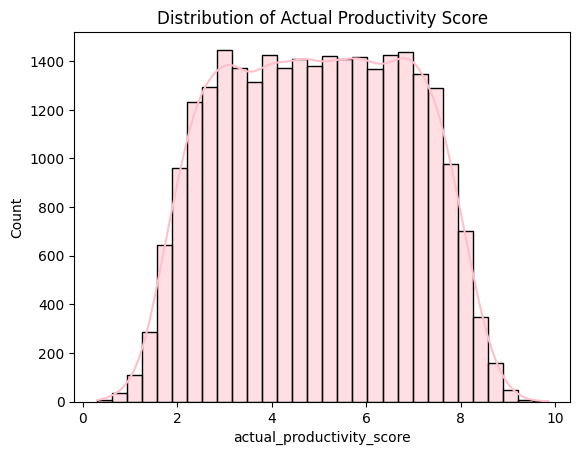

In [27]:
sns.histplot(df['actual_productivity_score'], bins=30, kde=True,color='pink')
plt.title("Distribution of Actual Productivity Score")
plt.show()

In [28]:
df.head()

,age,gender,daily_social_media_time,work_hours_per_day,actual_productivity_score,stress_level,sleep_hours,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score,social_media_intensity,work_stress_ratio,rest_work_balance,focus_support
0,56.0,0.0,4.180940,6.753558,7.291555,4.0,5.116546,8.0,0,0,4.0,11.0,21.927072,6.336688,0.619072,1.350712,1.221428,0
1,46.0,0.0,3.249603,9.169296,5.165093,7.0,5.103897,7.0,1,1,2.0,25.0,0.000000,3.412427,0.354400,1.146162,0.556629,2
2,32.0,0.0,3.113776,7.910952,3.474053,4.0,8.583222,0.0,1,0,3.0,17.0,10.322044,2.474944,0.393603,1.582190,1.271377,1
3,60.0,1.0,3.113776,6.355027,1.774869,6.0,6.052984,1.0,0,0,0.0,4.0,23.876616,1.733670,0.489971,0.907861,1.489204,0
5,38.0,0.0,1.512568,6.429312,4.081026,5.0,5.515251,5.0,0,1,5.0,2.0,0.000000,4.568728,0.235261,1.071552,0.857829,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27635 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             27635 non-null  float64
 1   gender                          26561 non-null  float64
 2   daily_social_media_time         27635 non-null  float64
 3   work_hours_per_day              27635 non-null  float64
 4   actual_productivity_score       27635 non-null  float64
 5   stress_level                    27635 non-null  float64
 6   sleep_hours                     27635 non-null  float64
 7   breaks_during_work              27635 non-null  float64
 8   uses_focus_apps                 27635 non-null  int64  
 9   has_digital_wellbeing_enabled   27635 non-null  int64  
 10  coffee_consumption_per_day      27635 non-null  float64
 11  days_feeling_burnout_per_month  27635 non-null  float64
 12  weekly_offline_hours            27635

In [30]:
df.describe()

,age,gender,daily_social_media_time,work_hours_per_day,actual_productivity_score,stress_level,sleep_hours,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score,social_media_intensity,work_stress_ratio,rest_work_balance,focus_support
count,27635.000000,26561.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000,27635.000000
mean,41.479826,0.498663,3.075757,6.991494,4.951805,5.521136,6.500628,4.988022,0.301248,0.247078,1.997612,15.563886,10.340999,4.958441,0.489493,1.382688,1.269251,0.548326
std,13.841794,0.500008,1.812850,1.993829,1.883378,2.773613,1.394834,3.174607,0.458809,0.431320,1.391434,9.249108,7.231193,2.024710,0.371143,0.944090,0.600351,0.631671
min,18.000000,0.000000,0.000000,1.574654,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143150,0.256720,0.000000
25%,30.000000,0.000000,1.790770,5.642869,3.373284,3.000000,5.603653,2.000000,0.000000,0.000000,1.000000,8.000000,4.547004,3.522721,0.250729,0.757877,0.900065,0.000000
50%,41.000000,0.000000,3.113776,6.988265,4.951742,5.521136,6.500628,5.000000,0.000000,0.000000,2.000000,16.000000,10.015012,4.958441,0.432500,1.072895,1.138189,0.000000
75%,53.000000,1.000000,4.225514,8.355012,6.526342,8.000000,7.394486,8.000000,1.000000,0.000000,3.000000,24.000000,15.276354,6.401452,0.650251,1.673319,1.471289,1.000000
max,65.000000,1.000000,7.877630,12.000000,9.846258,10.000000,10.000000,10.000000,1.000000,1.000000,6.000000,31.000000,31.370380,10.000000,5.002768,6.000000,8.431278,2.000000


# Models to predict Productivity Score

## Select Relevant Features

In [49]:
X = df.drop(columns=["actual_productivity_score"])  
y = df["actual_productivity_score"] 

X = pd.get_dummies(X, drop_first=True)

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)



## Train Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

## Initialize 3 Models

In [51]:
model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)
catboost_model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_state=42
)

## Baseline Regression Models

In [52]:
model_lr.fit(X_train_scaled, y_train)
model_rf.fit(X_train_imputed, y_train)
model_xgb.fit(X_train_imputed, y_train)
catboost_model.fit(X_train_imputed, y_train)

In [53]:
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test_imputed)
y_pred_xgb = model_xgb.predict(X_test_imputed)
y_pred_catboost = catboost_model.predict(X_test_imputed)

## Hyperparameter Tuning Model

### Random Forest

In [54]:
rf_param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

rf_grid.fit(X_train_imputed, y_train)
print("\nBest Parameters:", rf_grid.best_params_)

best_rf = rf_grid.best_estimator_



Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 400}


### XGBoost

In [55]:
xgb_param_grid = {
    "n_estimators": [200, 400],
    "learning_rate": [0.03, 0.05],
    "max_depth": [4, 6],
    "subsample": [0.8, 1.0],
}

xgb_grid = GridSearchCV(
    XGBRegressor(
        objective="reg:squarederror",
        random_state=42
    ),
    xgb_param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

xgb_grid.fit(X_train_imputed, y_train)
print("\nBest Parameters:", xgb_grid.best_params_)

best_xgb = xgb_grid.best_estimator_



Best Parameters: {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1.0}


### Catboost

In [56]:
# Define parameter grid
CB_param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'random_strength': [0.1, 1, 10]  # Important for reducing overfitting
}

# Create CatBoost model
catboost = CatBoostRegressor(
    random_seed=42,
    verbose=0,
    loss_function='RMSE'
)

# Grid search
CB_grid_search = GridSearchCV(
    estimator=catboost,
    param_grid=CB_param_grid,
    cv=3,  # Fewer folds for speed
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

CB_grid_search.fit(X_train_imputed, y_train)
print("\nBest Parameters:", CB_grid_search.best_params_)

best_catboost = CB_grid_search.best_estimator_


Fitting 3 folds for each of 243 candidates, totalling 729 fits

Best Parameters: {'depth': 4, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1, 'random_strength': 0.1}


## Final Evaluation

In [58]:
results_df = pd.DataFrame([
    {
        "Model": "Linear Regression (Base)",
        "MAE": mean_absolute_error(y_test, y_pred_lr),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        "R2": r2_score(y_test, y_pred_lr)
    },
    {
        "Model": "Random Forest (Base)",
        "MAE": mean_absolute_error(y_test, y_pred_rf),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        "R2": r2_score(y_test, y_pred_rf)
    },
    {
        "Model": "XGBoost (Base)",
        "MAE": mean_absolute_error(y_test, y_pred_xgb),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        "R2": r2_score(y_test, y_pred_xgb)
    },
    {
        "Model": "CatBoost (Base)",
        "MAE": mean_absolute_error(y_test, y_pred_xgb),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        "R2": r2_score(y_test, y_pred_xgb)
    }
])

y_pred_rf_tuned = best_rf.predict(X_test_imputed)
y_pred_xgb_tuned = best_xgb.predict(X_test_imputed)
y_pred_catboost_tuned = best_catboost.predict(X_test_imputed)

tuned_results = [
    {
        "Model": "Random Forest (Tuned)",
        "MAE": mean_absolute_error(y_test, y_pred_rf_tuned),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned)),
        "R2": r2_score(y_test, y_pred_rf_tuned)
    },
    {
        "Model": "XGBoost (Tuned)",
        "MAE": mean_absolute_error(y_test, y_pred_xgb_tuned),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned)),
        "R2": r2_score(y_test, y_pred_xgb_tuned)
    },
    {
        "Model": "CatBoost (Tuned)",
        "MAE": mean_absolute_error(y_test, y_pred_catboost_tuned),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_catboost_tuned)),
        "R2": r2_score(y_test, y_pred_catboost_tuned)
    }
]

final_results_df = pd.concat(
    [results_df, pd.DataFrame(tuned_results)],
    ignore_index=True
).sort_values("RMSE")

final_results_df


,Model,MAE,RMSE,R2
6,CatBoost (Tuned),0.772593,1.007221,0.718395
5,XGBoost (Tuned),0.773158,1.007759,0.718094
4,Random Forest (Tuned),0.775392,1.011881,0.715783
3,CatBoost (Base),0.777658,1.012863,0.715231
2,XGBoost (Base),0.777658,1.012863,0.715231
0,Linear Regression (Base),0.789573,1.021146,0.710554
1,Random Forest (Base),0.783012,1.022298,0.709901


# Models to Cluster User Type

In [69]:
cluster_features = [
    "actual_productivity_score",
    "days_feeling_burnout_per_month"
]

df_cluster = df[cluster_features].copy()


In [70]:
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(df_cluster)


In [71]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import hdbscan

# X_cluster_scaled = your scaled data
X = X_cluster_scaled

# Range of cluster numbers to test
cluster_range = range(2, 11)

# Store results
results = []

def evaluate_model(labels, model_name, k):
    """Compute internal clustering metrics."""
    if len(set(labels)) <= 1:  # invalid clustering
        return None

    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    ch = calinski_harabasz_score(X, labels)

    return {
        "Model": model_name,
        "Clusters": k,
        "Silhouette": sil,
        "Davies-Bouldin": db,
        "Calinski-Harabasz": ch
    }


# ======================================================
# 1. K-MEANS
# ======================================================
for k in cluster_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    res = evaluate_model(labels, "KMeans", k)
    if res: results.append(res)

# ======================================================
# 2. GMM
# ======================================================
for k in cluster_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X)
    res = evaluate_model(labels, "GMM", k)
    if res: results.append(res)

# ======================================================
# 3. AGGLOMERATIVE
# ======================================================
for k in cluster_range:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X)
    res = evaluate_model(labels, "Agglomerative", k)
    if res: results.append(res)

# ======================================================
# 4. BIRCH
# ======================================================
for k in cluster_range:
    bir = Birch(n_clusters=k)
    labels = bir.fit_predict(X)
    res = evaluate_model(labels, "BIRCH", k)
    if res: results.append(res)

# ======================================================
# 5. HDBSCAN (only once, no cluster number)
# ======================================================
hdb = hdbscan.HDBSCAN(min_cluster_size=30)
labels = hdb.fit_predict(X)

if len(set(labels)) > 1:
    res = evaluate_model(labels, "HDBSCAN", len(set(labels)))
    if res: results.append(res)


# Convert results to DataFrame
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="Silhouette", ascending=False)

print("\n===== BEST CLUSTERING RESULTS (Sorted by Silhouette) =====")
print(df_results_sorted)


c:\Users\Jia Xuan\miniconda3\envs\FYP\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Jia Xuan\miniconda3\envs\FYP\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



===== BEST CLUSTERING RESULTS (Sorted by Silhouette) =====
            Model  Clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz
2          KMeans         4    0.398781        0.781776       26468.335207
11            GMM         4    0.398778        0.781789       26466.055776
3          KMeans         5    0.380095        0.846893       24597.445456
1          KMeans         3    0.368891        0.882789       20403.224293
4          KMeans         6    0.367048        0.842470       24260.138955
13            GMM         6    0.365771        0.805264       23690.448163
10            GMM         3    0.365553        0.885261       19969.509631
12            GMM         5    0.361296        0.824067       24113.240901
5          KMeans         7    0.359999        0.806228       24582.591108
14            GMM         7    0.357880        0.793869       24388.049673
0          KMeans         2    0.355139        1.176864       16617.353513
9             GMM         2    0.355139 

In [72]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_cluster_scaled)

# Cluster centers (scaled)
centers_scaled = kmeans.cluster_centers_

# Convert back to original scale
centers = scaler.inverse_transform(centers_scaled)

cluster_centers_df = pd.DataFrame(
    centers,
    columns=["actual_productivity_score", "days_feeling_burnout_per_month"]
)

cluster_centers_df


,actual_productivity_score,days_feeling_burnout_per_month
0,3.360488,7.586162
1,3.315601,23.591801
2,6.590834,7.464916
3,6.533431,23.520923


In [73]:
df_cluster.describe()

,actual_productivity_score,days_feeling_burnout_per_month
count,27635.000000,27635.000000
mean,4.951805,15.563886
std,1.883378,9.249108
min,0.296812,0.000000
25%,3.373284,8.000000
50%,4.951742,16.000000
75%,6.526342,24.000000
max,9.846258,31.000000
